Name: Sarthak Hajirnis

Affiliation: Pursuing M.Sc Physics at the Institute of Science, Mumbai, India

E-mail: sarthakhajirnis500@gmail.com

# Classification of Collision events
This notebook goes through the second approache as discussed in performing image classification using Convolutional Neural Networks.

In [ ]:
#Importing relevant packages
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import *
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras import backend as K
from google.colab import drive
import pickle as pkl
import pandas as pd
import numpy as np
import itertools

In [ ]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


# Preparing and loading the data
The raw labelled data needed for this project comes in the form of a pickle file which needs to be unpickled using sorting function.

These sorted images are then stored in our local drive. The extremely huge amount of Pion samples, which was responsible for making our model perform poorly is eing addressed here.

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/413061_790525_bundle_archive/event1.pkl', 'rb') as f:
    Y_1 = pkl.load(f)
with open('/content/drive/My Drive/Colab Notebooks/413061_790525_bundle_archive/event10.pkl', 'rb') as f:
    Y_10 = pkl.load(f)
with open('/content/drive/My Drive/Colab Notebooks/413061_790525_bundle_archive/event100.pkl', 'rb') as f:
    Y_100 = pkl.load(f)
with open('/content/drive/My Drive/Colab Notebooks/413061_790525_bundle_archive/event101.pkl', 'rb') as f:
    Y_101 = pkl.load(f)
with open('/content/drive/My Drive/Colab Notebooks/413061_790525_bundle_archive/event102.pkl', 'rb') as f:
    Y_102 = pkl.load(f)
with open('/content/drive/My Drive/Colab Notebooks/413061_790525_bundle_archive/event103.pkl', 'rb') as f:
    Y_103 = pkl.load(f)
with open('/content/drive/My Drive/Colab Notebooks/413061_790525_bundle_archive/event104.pkl', 'rb') as f:
    Y_104 = pkl.load(f)
with open('/content/drive/My Drive/Colab Notebooks/413061_790525_bundle_archive/event105.pkl', 'rb') as f:
    Y_105 = pkl.load(f)

In [ ]:
#Raw arrays to jpg image conversion using sorting function and image resizing

def array_jpg_conversion(i,x,address):
  from PIL import Image
  new_p = Image.fromarray(250*(1-np.exp(-x/3)))
  if new_p.mode != 'RGB':
    new_p = new_p.convert('RGB')
  new_image = new_p.resize((30, 30))
  new_image.save(address + str(i) +'.jpeg')

In [ ]:
#Storing these sorted images in our local drive
#training data

data = [Y_1, Y_10, Y_100, Y_101, Y_102, Y_103, Y_104, Y_105]
iter = 0
for j in data:
  for i in range(0,2000):
    iter = iter +1 
    if (j[1][i] == 11):
      array_jpg_conversion(i,j[0][i],'/content/drive/My Drive/Colab Notebooks/images3/train/11/')
    elif (j[1][i] == 13):
      array_jpg_conversion(i, j[0][i], '/content/drive/My Drive/Colab Notebooks/images3/train/13/')
    elif (j[1][i] == 211):
      if i<1000:
        array_jpg_conversion(i, j[0][i], '/content/drive/My Drive/Colab Notebooks/images3/train/211/')
      else:
        pass
    elif (j[1][i] == 321):
      array_jpg_conversion(i,j[0][i],'/content/drive/My Drive/Colab Notebooks/images3/train/321/')
    elif (j[1][i] == 2212):
      array_jpg_conversion(i,j[0][i],'/content/drive/My Drive/Colab Notebooks/images3/train/2212/')
print(iter)

16000


In [ ]:
#validation data

data = [Y_1, Y_10, Y_100, Y_101, Y_102]
iter = 0
for j in data:
  for i in range(2000,2500):
    iter = iter +1 
    if (j[1][i] == 11):
      array_jpg_conversion(i,j[0][i],'/content/drive/My Drive/Colab Notebooks/images3/valid/11/')
    elif (j[1][i] == 13):
      array_jpg_conversion(i, j[0][i], '/content/drive/My Drive/Colab Notebooks/images3/valid/13/')
    elif (j[1][i] == 211):
      if i<2200:
        array_jpg_conversion(i, j[0][i], '/content/drive/My Drive/Colab Notebooks/images3/valid/211/')
      else:
        pass
    elif (j[1][i] == 321):
      array_jpg_conversion(i,j[0][i],'/content/drive/My Drive/Colab Notebooks/images3/valid/321/')
    elif (j[1][i] == 2212):
      array_jpg_conversion(i,j[0][i],'/content/drive/My Drive/Colab Notebooks/images3/valid/2212/')
print(iter)

2500


In [ ]:
#prediction or testing data

data = [Y_1, Y_10, Y_100, Y_101, Y_102]
iter = 0
for j in data:
  for i in range(2500,2800):
    iter = iter +1 
    if (j[1][i] == 11):
      array_jpg_conversion(i,j[0][i],'/content/drive/My Drive/Colab Notebooks/images3/test/11/')
    elif (j[1][i] == 13):
      array_jpg_conversion(i, j[0][i], '/content/drive/My Drive/Colab Notebooks/images3/test/13/')
    elif (j[1][i] == 211):
      if i<2550:
        array_jpg_conversion(i, j[0][i], '/content/drive/My Drive/Colab Notebooks/images3/test/211/')
      else:
        pass
    elif (j[1][i] == 321):
      array_jpg_conversion(i,j[0][i],'/content/drive/My Drive/Colab Notebooks/images3/test/321/')
    elif (j[1][i] == 2212):
      array_jpg_conversion(i,j[0][i],'/content/drive/My Drive/Colab Notebooks/images3/test/2212/')
print(iter)

1500


# Creating batches

In this section, we create training, validation and testing batches by defining the relevant paths to the local directories and assigning row vector to our dataset

In [ ]:
train_path = '/content/drive/My Drive/Colab Notebooks/images3/train'
valid_path = '/content/drive/My Drive/Colab Notebooks/images3/valid'
test_path = '/content/drive/My Drive/Colab Notebooks/images3/test'

In [ ]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size = (30,30), classes = ['11','13','211','321','2212'], batch_size = 15)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size = (30,30), classes = ['11','13','211','321','2212'], batch_size = 15)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size = (30,30), classes = ['11','13','211','321','2212'], batch_size = 15)

Found 3489 images belonging to 5 classes.
Found 641 images belonging to 5 classes.
Found 326 images belonging to 5 classes.


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


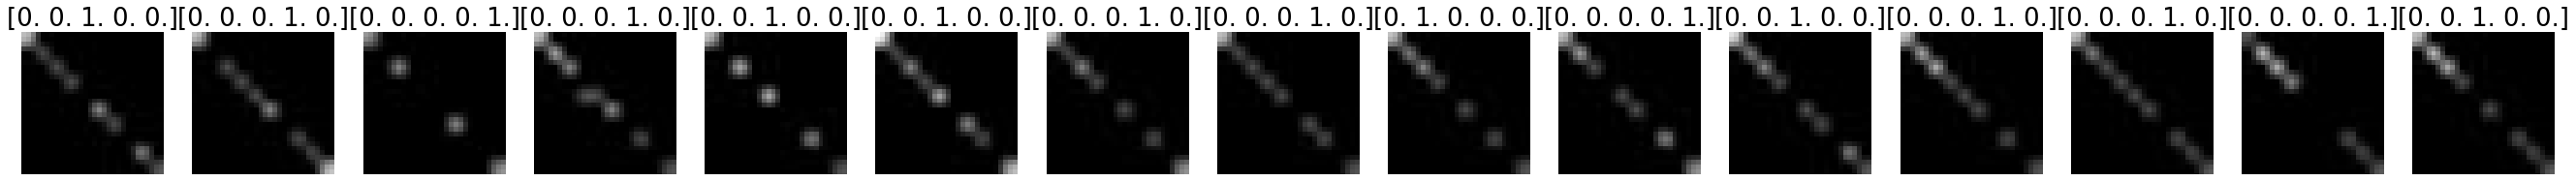

In [ ]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(50,50), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=26)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
imgs, labels = next(train_batches)
plots(imgs, titles=labels)

# Machine Learning
Creating the neural network, optimization and prediction of our model on new unseen images.

In [ ]:
# Create the model

model = Sequential([
        Conv2D(32, (3, 3), activation = 'relu', input_shape = (30,30,3), padding = 'same'),
        Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
        Flatten(),
        Dense(1000, activation = 'relu'),
        Dense(500, activation = 'relu'),
        Dense(5, activation = 'softmax'),
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 1000)              28801000  
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2505      
Total params: 29,314,149
Trainable params: 29,314,149
Non-trainable params: 0
____________________________________________

In [ ]:
model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

#steps_per_epoch = no. of images in training/batch_size
#validation_steps = no. of images in validation/batch_size
history = model.fit_generator(train_batches, steps_per_epoch = 232, validation_data = valid_batches, validation_steps = 42, epochs = 20, verbose = 2)

Epoch 1/20 
 - 95s - loss: 3.1280 - accuracy: 0.3501 - val_loss: 1.6520 - val_accuracy: 0.3332 
 Epoch 2/20 
 - 95s - loss: 1.0980 - accuracy: 0.4069 - val_loss: 1.2330 - val_accuracy: 0.3156 
 Epoch 3/20 
 - 95s - loss: 0.9960 - accuracy: 0.4356 - val_loss: 1.0890 - val_accuracy: 0.3906 
 Epoch 4/20 
 - 99s - loss: 0.8954 - accuracy: 0.4569 - val_loss: 0.9654 - val_accuracy: 0.4217 
 Epoch 5/20 
 - 96s - loss: 0.8654 - accuracy: 0.4758 - val_loss: 0.9632 - val_accuracy: 0.4040 
 Epoch 6/20 
 - 96s - loss: 0.7852 - accuracy: 0.4929 - val_loss: 0.9700 - val_accuracy: 0.4592 
 Epoch 7/20 
 - 97s - loss: 0.7200 - accuracy: 0.5156 - val_loss: 0.8745 - val_accuracy: 0.4708 
 Epoch 8/20 
 - 96s - loss: 0.6888 - accuracy: 0.5396 - val_loss: 0.8579 - val_accuracy: 0.4566 
 Epoch 9/20 
 - 96s - loss: 0.6311 - accuracy: 0.5629 - val_loss: 0.8000 - val_accuracy: 0.4632 
 Epoch 10/20 
 - 99s - loss: 0.6917 - accuracy: 0.5826 - val_loss: 0.8455 - val_accuracy: 0.4752 
 Epoch 11/20 
 - 96s - loss: 0

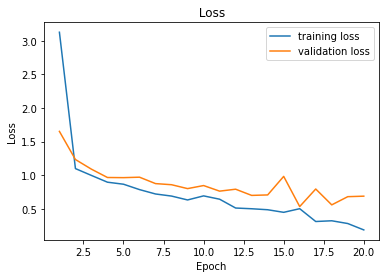

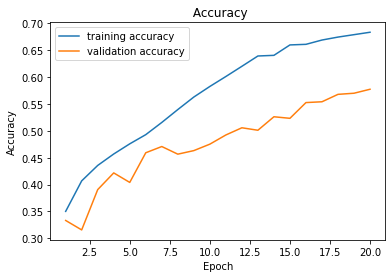

In [ ]:
#Plotting the results

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training loss', 'validation loss'])
plt.show()

plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training accuracy', 'validation accuracy'])
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


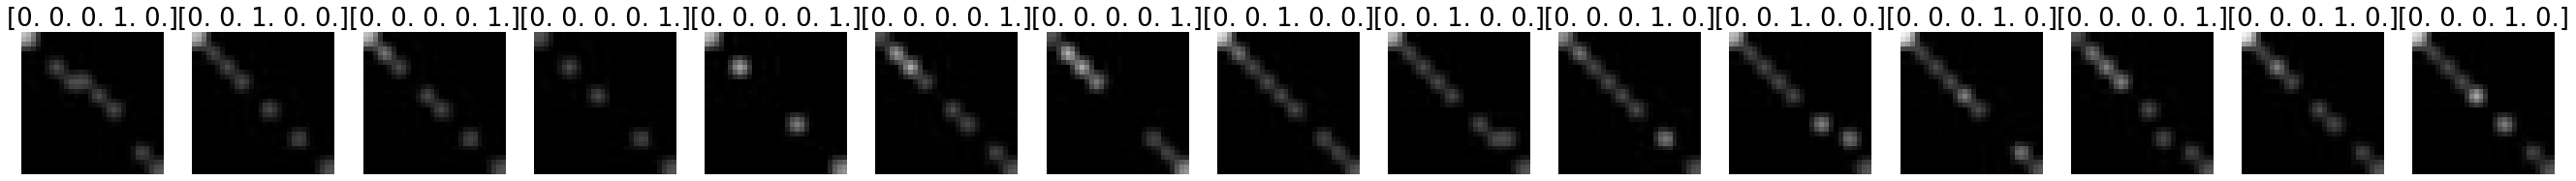

In [ ]:
#Creating prediction/testing batches

test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [ ]:
#Prediction

predictions = model.predict_generator(test_batches, steps=12, verbose=0)
#steps = no of images in test/batch_size
print(predictions)

[[1.75446039e-04 5.03696428e-05 2.26292297e-01 5.21636903e-01
  2.51844972e-01]
 [1.01818943e-04 2.66069833e-06 3.44646461e-02 5.29560864e-01
  4.35870022e-01]
 [1.57948831e-04 5.00777678e-05 6.02606274e-02 3.13777030e-01
  6.25754297e-01]
 [8.16199201e-16 1.80801157e-26 1.38405181e-08 1.34049216e-03
  9.98659492e-01]
 [2.45654246e-06 7.16880333e-10 7.69574009e-03 3.60169381e-01
  6.32132471e-01]
 [1.54876448e-02 1.36406015e-04 1.58187047e-01 3.28620344e-01
  4.97568578e-01]
 [1.70123938e-03 4.52486347e-05 3.81373495e-01 4.04691249e-01
  2.12188736e-01]
 [6.20668696e-04 2.72307489e-06 5.88866472e-01 3.71131808e-01
  3.93783711e-02]
 [2.00225713e-06 1.29354596e-10 2.43547812e-01 6.52862728e-01
  1.03587478e-01]
 [1.74352259e-03 9.25963686e-05 4.24681276e-01 3.02151650e-01
  2.71330923e-01]
 [1.87005079e-03 9.01184321e-05 7.41835777e-03 4.40403253e-01
  5.50218284e-01]
 [3.11453419e-04 2.26562006e-05 4.38129514e-01 4.55741018e-01
  1.05795331e-01]
 [1.97709032e-05 1.93587894e-05 1.674133

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)
for i in rounded_predictions:
  print(i)

3
3
4
4
4
4
3
2
3
2
4
3
3
3
2
4
2
3
3
3
2
2
3
2
4
3
4
4
3
2
4
4
3
4
3
3
3
3
3
3
2
2
2
2
4
2
2
2
2
3
3
3
3
3
3
4
3
4
4
3
0
0
2
2
2
4
3
2
2
3
2
3
4
3
3
2
3
2
2
4
4
2
3
2
2
2
2
3
2
4
4
2
3
4
4
3
4
3
3
3
3
3
4
4
2
3
2
3
3
3
3
2
4
2
4
3
2
4
4
3
2
4
3
3
3
3
4
3
4
3
4
3
2
2
2
3
4
4
3
2
3
2
4
4
2
3
4
3
3
4
3
2
3
2
3
4
3
4
3
4
3
2
2
3
3
4
3
3
3
3
2
4
3
2
4
4
4
3
3
3
0


In [ ]:
#Creating Confusion matrix for further optimization
#without normalization

y_pred = rounded_predictions[0:15]
y_true = [3,2,4,4,4,4,4,2,2,3,2,3,4,3,3] #Needed to be entered manually
cm = confusion_matrix(y_pred, y_true)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1 2 0]
 [2 3 2]
 [1 0 4]]


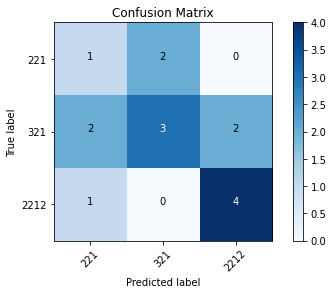

In [ ]:
cm_plot_labels = ['221','321','2212']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

[3 3 4 4 4 4 3 2 3 2 4 3 3 3 2]
Normalized confusion matrix
[[0.33333333 0.66666667 0.        ]
 [0.28571429 0.42857143 0.28571429]
 [0.2        0.         0.8       ]]


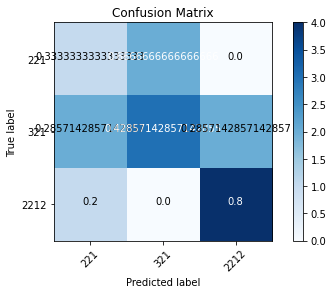

In [ ]:
#with normalization

y_pred = rounded_predictions[0:15]
print(y_pred)
y_true = [3,2,4,4,4,4,4,2,2,3,2,3,4,3,3]
cm = confusion_matrix(y_pred, y_true)
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm_plot_labels = ['221','321','2212']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')